In [1]:
from PIL import Image 

t = !python detect.py --conf 0.1 --img-size 600 --source images.jpg --view-img --no-trace --save-txt --name plates --project extraction --save-conf


In [3]:
img_path = t[-2].split()[-1]
tmp = img_path.split('\\')
dim = len(tmp)
label_path = ''
for i,j in enumerate(tmp):
    if i == 0:
        label_path = label_path + j
    elif i == dim-2:
        label_path = label_path + '\\' + j + '\\labels'
    elif i == dim-1:
        label_path = label_path + '\\' + j.split('.')[0] + '.txt'
    else:
        label_path = label_path + '\\' + j


with  open(label_path,'r') as file:
    labels = file.readlines()
img = Image.open(img_path)
# img.show()
height  = img.height
width = img.width
detect_list = []
for i in labels:
    value = [float(a) for a in i.split()]
    left_x = int(width * float(value[1] - value[3]/2))
    right_x = int(width * float(value[1] + value[3]/2))
    left_y = int(height * float(value[2] - value[4]/2))
    right_y = int(height * float(value[2] + value[4]/2))
    detect_list.append([img.crop((left_x, left_y, right_x, right_y)),value[5],left_x,right_x,left_y,right_y])


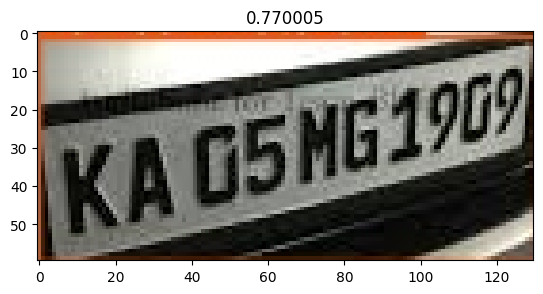

In [4]:
import matplotlib.pyplot as plt
for i,j in enumerate(detect_list):
    plt.subplot(1,len(detect_list),i+1)
    plt.imshow(j[0])
    plt.title(j[1])

plt.show()